# Метод Kmeans 

## автоматизация определения наилучшего количества кластеров с помощью elbow

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path
import pandas as pd
import pylab

# Функция рисования многоугольника (понадобится в конце для наглядности)

def drawPolygons (axes, polygon):
    polygon_1 = matplotlib.patches.Polygon (polygon)
    axes.add_patch (polygon_1)

# Генерим случайный набор данных   
random = ([1]*20 + [6]*20 + [92]*20 + [120]*20) * np.random.rand(80)   

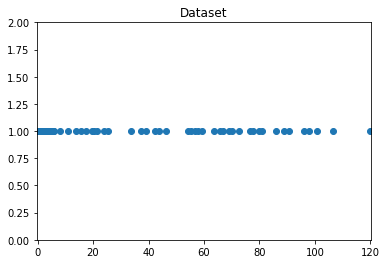

In [8]:
#x1 - это значения по x, x2 - по y, поскольку у нас 1-размерный случай, все y приравниваем 1
x1 = np.array(random)
x2 = np.array([1] * len(x1))

#вывод множества на экран
plt.plot()
plt.xlim([min(x1)-0.5, max(x1)+0.5])
plt.ylim([0, 2])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

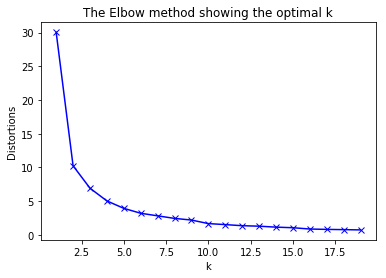

In [10]:
#Склеиваем пары x-y
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
distortions = []

#Решаем цикл для разного количества кластеров, собираем distortion для каждого значения 
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(X)
    kmeanModel.fit(X)
    label = kmeanModel.labels_
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#Выводим получившивеся distorion для каждого количества кластеров    
plt.plot(K,distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow method showing the optimal k')
plt.show()

# Нахождение оптимального количества кластеров

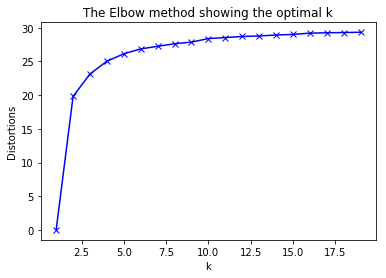

In [19]:
#Переворачиваем график
elbow_sq = -np.array(distortions) + distortions[0]
plt.plot(K,elbow_sq, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow method showing the optimal k')
plt.show()

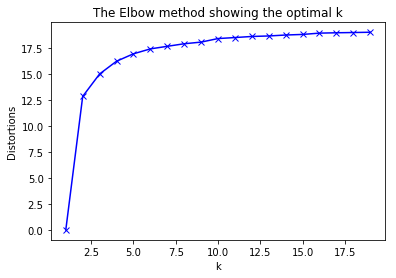

In [20]:
#Проводим своего рода стандартизацию, чтобы график помещался в квадрате
elbow_sq = elbow_sq * (len(elbow_sq)) / elbow_sq[-1]
# Обратите внимание что оси x и y теперь имеют одинаковые значения
plt.plot(K,elbow_sq, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow method showing the optimal k')
plt.show()

In [ ]:
#Находим площадь полигона
# Для этого каждую из 20 точек кривой соединяем с точкой (1,0) (поскольку с нее начинается график)
# И с правым верхним углом квадрата (координаты можно обозначить как (len(elbow_sq), len(elbow_sq)))
# После этого находим площадь полигона
# Для простоты нахождения площади, полигон был разбит на два треугольника и квадрат

square_1 = elbow_sq * (len(elbow_sq) - np.arange(len(elbow_sq)))
rectangle_1 = elbow_sq * np.arange(len(elbow_sq)) / 2
rectangle_2 = (len(elbow_sq) - elbow_sq) * (len(elbow_sq) - np.arange(len(elbow_sq))) / 2
square_poly = square_1 + rectangle_1 + rectangle_2

In [ ]:
# K-best это значения точки с коодиной x, для которого площадь полигона получилась максимальной
k_best = np.where(square_poly == max(square_poly))[0][0] + 1

# Обучаем модель с заданным количеством кластеров
kmeanModel = KMeans(n_clusters=k_best).fit(X)

Best number of clusters = 4


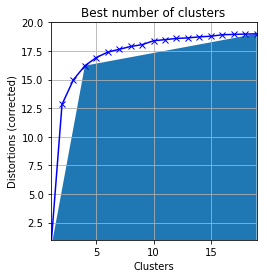

In [17]:
#Задаем точки полигона для оптимального кластера
polygon = [(1,0), (k_best, elbow_sq[k_best-1]), (len(elbow_sq), elbow_sq[-1]), (len(elbow_sq),0)]

#Рисуем для наглядности полученную площадь
if __name__ == "__main__":
    pylab.xlim (1, len(elbow_sq))
    pylab.ylim (1, len(elbow_sq) + 1)
    pylab.grid()

    # Получим текущие оси
    axes = pylab.gca()
    axes.set_aspect("equal")

    drawPolygons (axes, polygon)
    pylab.plot(K, elbow_sq, 'bx-')

    pylab.xlabel('Clusters')
    pylab.ylabel('Distortions (corrected)')
    pylab.title('Best number of clusters')
    print('Best number of clusters = ' + str(k_best))
    pylab.show()